[*********************100%%**********************]  1 of 1 completed


In [9]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



# Xử lý dữ liệu thiếu
eth_data.dropna(inplace=True)

# Chọn các biến giải thích và biến mục tiêu
X = eth_data[['RSI', 'StockRSI', 'Volume', 'EMA']]
y = eth_data['Close']

# Xử lý dữ liệu bằng cách loại bỏ các dòng chứa giá trị NaN
eth_data.dropna(inplace=True)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Huấn luyện mô hình Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train, y_train)

# Huấn luyện mô hình Deep Neural Networks
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model_nn.compile(optimizer='adam', loss='mean_squared_error')
model_nn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Đánh giá mô hình Random Forest
y_pred_rf = model_rf.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Đánh giá mô hình Gradient Boosting
y_pred_gb = model_gb.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Đánh giá mô hình Deep Neural Networks
y_pred_nn = model_nn.predict(X_test)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# In kết quả
print("Random Forest:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared:", r2_rf)
print()
print("Gradient Boosting:")
print("Mean Absolute Error:", mae_gb)
print("Mean Squared Error:", mse_gb)
print("R-squared:", r2_gb)
print()
print("Deep Neural Networks:")
print("Mean Absolute Error:", mae_nn)
print("Mean Squared Error:", mse_nn)
print("R-squared:", r2_nn)


D:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Random Forest:
Mean Absolute Error: 31.58089414221472
Mean Squared Error: 2924.0262206732227
R-squared: 0.9977756543790087

Gradient Boosting:
Mean Absolute Error: 35.500054985203256
Mean Squared Error: 3228.8700185423527
R-squared: 0.9975437556490717

Deep Neural Networks:
Mean Absolute Error: 2166.963874082685
Mean Squared Error: 10025749.68061554
R-squared: -6.626721074374563


Random Forest:

Mean Absolute Error (MAE) là 31.58, cho thấy trung bình lỗi dự đoán là khoảng 31.58 đơn vị.
Mean Squared Error (MSE) là 2924.03, cho thấy sự biến động của lỗi dự đoán trên một diện tích lớn.
R-squared (R2) là 0.9978, gần với 1, cho thấy mô hình giải thích được 99.78% sự biến thiên của dữ liệu.

Gradient Boosting:

MAE là 35.50, cao hơn so với Random Forest, cho thấy lỗi dự đoán trung bình tăng lên.
MSE là 3228.87, tương tự như Random Forest, nhưng cao hơn một chút.
R2 là 0.9975, gần với 1 nhưng thấp hơn so với Random Forest, có thể có một số biến động mà mô hình không giải thích được.

Deep Neural Networks:

MAE là 2166.96, cao hơn rất nhiều so với hai mô hình trước đó, cho thấy hiệu suất dự đoán của mạng nơ-ron sâu không tốt.
MSE là 10025749.68, cao hơn đáng kể so với hai mô hình trước đó.
R2 là -6.63, cho thấy mô hình không hoạt động tốt và dự đoán kém.

Dựa vào những đánh giá trên, ta có thể kết luận rằng Random Forest và Gradient Boosting có hiệu suất dự đoán tốt hơn so với Deep Neural Networks cho bài toán này.

D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


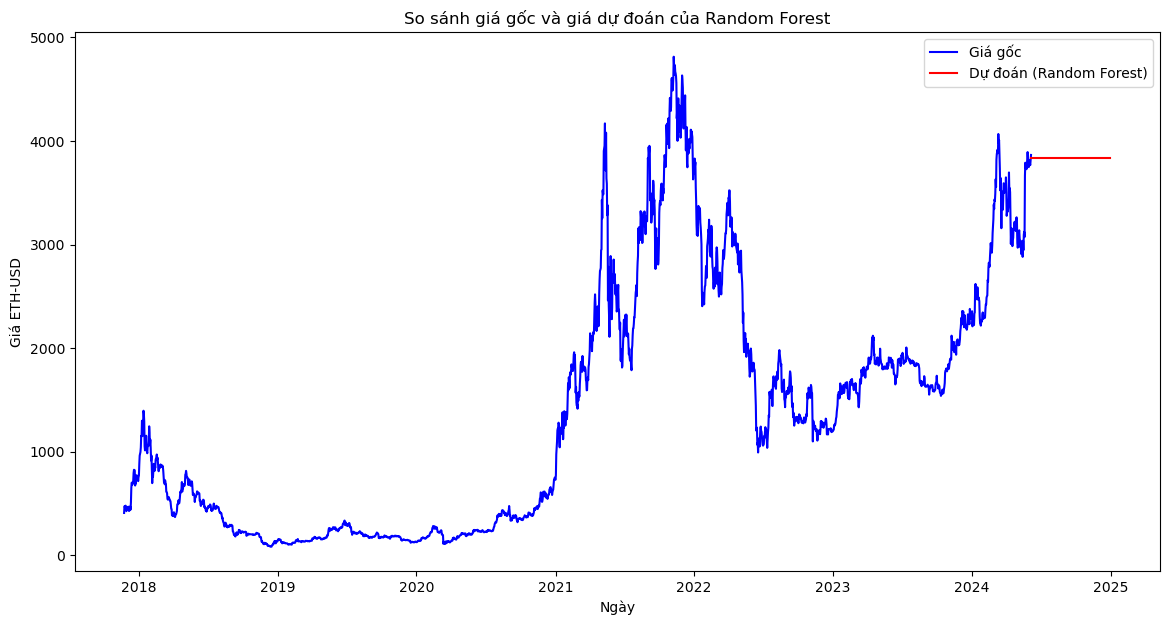

In [21]:
# Tính toán các biến giải thích cho mỗi ngày
def calculate_features_for_date(date):
    # Tính toán RSI, StockRSI, Volume, EMA cho ngày hiện tại
    # Lấy dữ liệu từ eth_data cho ngày hiện tại
    # Thực hiện tính toán tương tự như trong quá trình chuẩn bị dữ liệu huấn luyện
    # Trả về các giá trị tính toán được
    features = calculate_rsi(eth_data['Close'].loc[:date], 14)
    stock_rsi = calculate_rsi(features, 14)
    volume = eth_data['Volume'].loc[:date].mean()  # Giả sử bạn tính trung bình thể hiện của Volume
    ema = calculate_ema(eth_data['Close'].loc[:date], 9)
    return [features.iloc[-1], stock_rsi.iloc[-1], volume, ema.iloc[-1]]

# Dự đoán giá từ thời điểm hiện tại đến cuối năm 2024
future_dates = pd.date_range(start='2024-06-06', end='2024-12-31')
future_features = []

# Tính toán các biến giải thích cho các ngày tiếp theo
for date in future_dates:
    new_features = calculate_features_for_date(date)
    future_features.append(new_features)

# Dự đoán giá cho các ngày tiếp theo
predicted_prices = model_rf.predict(future_features)

# Vẽ đồ thị giá gốc và giá dự đoán từ thời điểm hiện tại đến cuối năm 2024
plt.figure(figsize=(14, 7))
plt.plot(eth_data.index, eth_data['Close'], label='Giá gốc', color='blue')
plt.plot(future_dates, predicted_prices, label='Dự đoán (Random Forest)', color='red')

plt.title('So sánh giá gốc và giá dự đoán của Random Forest')
plt.xlabel('Ngày')
plt.ylabel('Giá ETH-USD')
plt.legend()
plt.show()


D:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


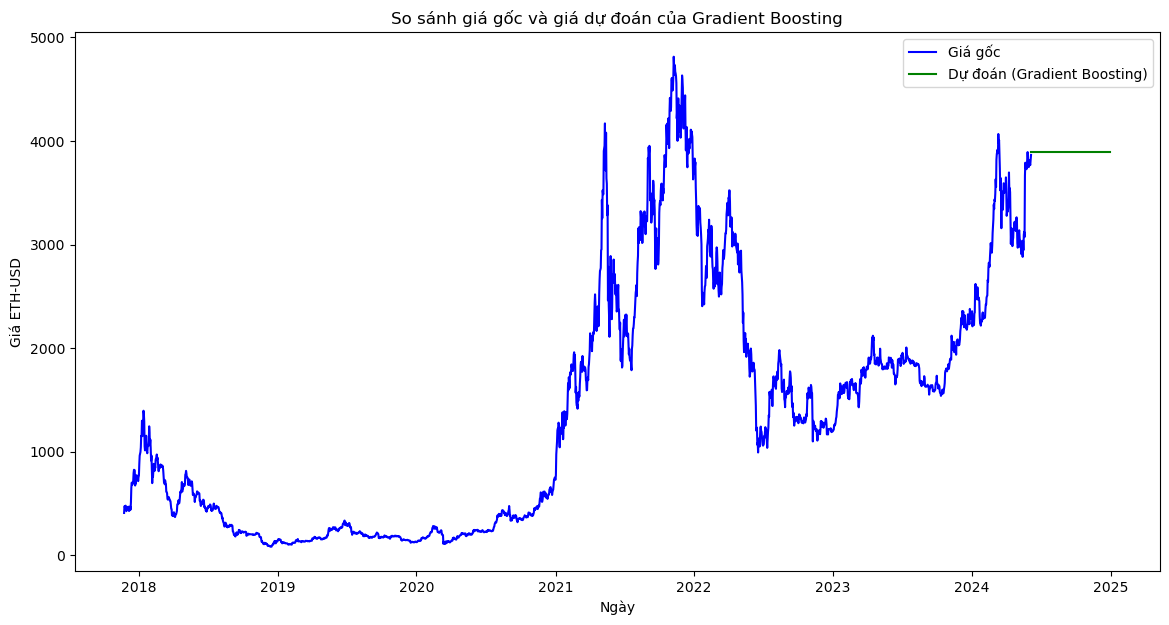

In [23]:
# Dự đoán giá cho các ngày tiếp theo sử dụng Gradient Boosting
predicted_prices_gb = model_gb.predict(future_features)

# Vẽ đồ thị giá gốc và giá dự đoán từ thời điểm hiện tại đến cuối năm 2024
plt.figure(figsize=(14, 7))
plt.plot(eth_data.index, eth_data['Close'], label='Giá gốc', color='blue')
plt.plot(future_dates, predicted_prices_gb, label='Dự đoán (Gradient Boosting)', color='green')

plt.title('So sánh giá gốc và giá dự đoán của Gradient Boosting')
plt.xlabel('Ngày')
plt.ylabel('Giá ETH-USD')
plt.legend()
plt.show()
